## **Библиотеки, функции, загрузка файла**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import matplotlib as mpl

Функции   

In [ ]:
def rename_columns(name):
    new_name = name.replace(' ', '_').lower()
    return new_name

Загрузка файла  

In [ ]:
file_id = '1ATASmLwbd-sVPOJ7kChU9fumc15lRvwK'
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
df = pd.read_csv(download_url)

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


# **Проверка гипотез**

В рамках блока "Проверка гипотез" первично мы хотим проверить гипотезы, что **средние значения наших переменных различаются по группам целевой переменной**. </br>

Напомним, что наша целевая переменная - **Response (отклик на маркетинговую кампанию по продаже золотого членства, которое дает 20% скидку)**.  </br>

Проверять статистические различие средних между группой тех, кто купил товар, и тех, кто не купил, - мы будет через **двухвыборочный t-test для двух независимых выборок.** </br>

Постановка гипотез выглядит следующим образом (на примере - переменной Income (доход)): </br>

**H<sub>0</sub>:** Средние доходы одинаковы у тех, кто откликнулся на кампанию, и у тех, не откликнулся.</br>

**H<sub>1</sub>:** Средние доходы по группам различаются.

Уровень статистической значимости - 95%.


Подготовка данных для проверки гипотез через t-test

In [ ]:
from scipy.stats import ttest_ind

df['Response'] = df['Response'].map({'Не купил':0 , 'Купил':1 })
df['Income'] = df['Income'].fillna(df['Income'].median())
df_response_1 = df[df.Response == 1]
df_response_0 = df[df.Response == 0]
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Response', 'Id', 'Teenhome', 'Kidhome', 'Complain'])

Гипотезы, которые мы будет проверять с помощью t-test, относятся к количественным переменным из нашего датасета:

**H<sub>1</sub>:** **Средние общие расходы (Total_Spending)** различаются у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
**Клиенты с высокими общими расходами** могут быть **более заинтересованными** принять маркетинговое предложение **с целью экономии** в конкретной сети. [Покупка программы лояльности также может увеличить траты](https://www.mckinsey.com/capabilities/growth-marketing-and-sales/our-insights/coping-with-the-big-switch-how-paid-loyalty-programs-can-help-bring-consumers-back-to-your-brand) данного клиента впоследствии на этот бренд, что применимо и к сети.
</br>
</br>

**H<sub>2</sub>:** **Средние доходы (Income)** различаются у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
**Клиенты с более высоким доходом реже принимают золотое членство**, потому что у них **нет прямой цели экономить**, а основной оффер золотого членства - 20% cкидка, но без привилегий и VIP-подхода - важных качеств для когорт с более высоким доходом.
</br>
</br>

**H<sub>3</sub>:** **Средний год рождения(Year_Birth)** различается у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
[По опросным данным](https://www.inc.com/peter-roesler/new-study-shows-deals-promotions-affect-every-part-of-shopping-experience.html) - **миллинеалы (18-34 лет) чаще ищут промо-предложение с скидками** в Интернете перед покупкой, чем представители старшего поколения (55+). Возможно, более старшие поколения их ищут в оффлайне, но различия возрастные могут быть, поэтому проверим данную гипотезу. Также метод проведения кампании может повлиять на средний возраст принятия оффера - [с возрастом люди чаще предпочитают телефонные звонки как средство коммуникации в России](https://iom.anketolog.ru/2021/08/31/pozvoni-mne).
</br>
</br>

**H<sub>4</sub>:** **Средний количество покупок со скидками (NumDealsPurchases)** различается у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
**Заинтересованные экономить на обычных скидках**, могут быть также заинтересованы сэкономить деньги за счет **скидки клубной карты** и чаще их приобретать.
</br>
</br>

**H<sub>5</sub>:** **Среднее количество посещений сайта (NumWebVisitsMonth)**  различается у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
[Более активными интернет-пользователями являются более молодые поколения](https://www.levada.ru/2024/04/23/auditoriya-polzovatelej-interneta-sotsialnyh-setej-messendzherov-i-vpn-servisov/), а они в свою очередь [не предпочитают коммуникацию через телефонный звонок](https://iom.anketolog.ru/2021/08/31/pozvoni-mne). Это могло повлиять на предложение им клубной карты.
</br>
</br>

**H<sub>6</sub>:** **Среднее количество покупок в оффлайн-магазине (NumStorePurchases)**  не различается у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
</br>

**H<sub>7</sub>:** **Среднее количество покупок через каталог (NumCatalogPurchases)**  не различается у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
</br>

**H<sub>8</sub>:** **Среднее количество покупок в онлайн-магазине(NumWebPurchases)**  не различается у тех, кто откликнулся на кампанию, и у тех, не откликнулся.
</br>
</br>

**H<sub>9</sub>:** **Среднее количество дней с последней покупки (Recency)**  различается у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
Клиенты, совершавшие **покупки недавно, чаще соглашаются**, в то время, как д**авние клиенты могли потерять лояльность к сети** и быть незаинтересованными в предложении.
</br>
</br>

**H<sub>10,11,12,13,14,15</sub>:** **Средние расходы по различным категориям (MntWines, MntFishProducts, MntFruits, MntGoldProds, MntSweetProducts, MntMeatProducts)**  различаются у тех, кто откликнулся на кампанию, и у тех, не откликнулся. </br>
В целом **чем выше траты, чем большее желание у клиентов может быть экономить** на них. Но скорее всего **эффект этого может быть выше в категориях с высоким чеком** - Вино(MntWines) или Золотые изделия (MntGoldProds).

</br>


In [ ]:
results = []


for col in numeric_cols:

    group1 = df_response_1[col]
    group0 = df_response_0[col]

    if not group1.equals(group0):
        stat, p = ttest_ind(group1, group0)
        results.append({
            'Variable': col,
            't-statistic': stat,
            'p-value': p,
            'Mean_response_1': group1.mean(),
            'Mean_response_0': group0.mean(),
            'p < 0.05 ': p < 0.05
        })


results_df = pd.DataFrame(results)
results_df['p-value'] = results_df['p-value'].apply(lambda x: f"{x:.4f}")


results_df.sort_values('p-value')


,Variable,t-statistic,p-value,Mean_response_1,Mean_response_0,p < 0.05
0,Income,6.341853,0.0000,60183.244012,50845.677597,True
1,MntFishProducts,5.299728,0.0000,52.050898,34.980063,True
2,MntFruits,5.974176,0.0000,38.203593,24.216684,True
3,MntGoldProds,6.681623,0.0000,61.446108,40.968520,True
4,MntMeatProducts,11.506382,0.0000,294.353293,144.624344,True
5,MntSweetProducts,5.591218,0.0000,38.634731,25.035152,True
6,MntWines,12.071816,0.0000,502.703593,269.104407,True
7,NumCatalogPurchases,10.710356,0.0000,4.203593,2.391920,True
10,NumWebPurchases,7.115161,0.0000,5.071856,3.911857,True
12,Recency,-9.578014,0.0000,35.383234,51.514690,True


### Выводы:
* Наша **H<sub>1</sub> подтвердилась - средние общие расходы (Total_Spending) выше у тех, кто откликнулся на кампанию, чтобы больше сэкономить.** Такие же результаты и с гипотезами по переменными расходов по категориям H<sub>10,11,12,13,14,15</sub> - средние по ним тоже статистически значимо выше у группы тех, кто оформил клубную карту.
* **Гипотеза H<sub>2</sub> подтвердилась, но в обратную сторону от наших предложений.** Средние различаются, но все же те, кто покупали клубные карты, были богаче тех, кто их себе не приобрел. Возможно, здесь есть **эффекты цены клубной карты - почти 500$**.
* **Гипотезы H<sub>7</sub> и H<sub>8</sub> не подтвердились.** В них мы не предполагали, что будет какая-то разница, так как не нашли доводов для их существования. Но все же статистическая разница в средних по переменным количества покупок в каталоге/онлайн-магазине существует
* **Гипотеза H<sub>9</sub> подтвердилась. Клиенты, совершавшие покупки недавно, чаще соглашаются.** Возможно, это связано с нашей предпоссылкой о лояльности клиента.
* **Средние статистически значимо не различаются только по четырем переменным - NumStorePurchases(H<sub>6</sub>), Year_Birth(H<sub>3</sub>), NumWebVisitsMonth (H<sub>5</sub>) и NumDealsPurchases (H<sub>4</sub>).** Это значит, что количество покупок в оффлайн-магазинах, возраст, количество посещений веб-сайта и количество покупок с скидками не различаются у тех, кто оформил клубную карту и у тех, кто ее не купил:
  - Для **NumStorePurchases(H<sub>6</sub>)** - мы не делали предпоссылок, что они будут различаться.
  - Для **Year_Birth(H<sub>3</sub>) и NumWebVisitsMonth (H<sub>5</sub>)** - основной предпоссылкой служило различие молодого и старшего поколения. При разведывательном анализе затрагиваются широкие возрастные группы, но возможно они не все репрезентативно представлены в датасете.
  - Для **NumDealsPurchases (H<sub>4</sub>)** - основной предпоссылкой являлось желание сэкономить, но возможно, данная группа пользователей и так экономит на обычных скидках, выбирая только данные товары, и они не готовы тратить 500 долларов на клубную карту для скидки на обычные товары.




## Гипотеза 1 – «Семьи с детьми больше стратят на сладости и  и чаще совершают покупки по скидкам»

**Формулировка**  
Семьи, где есть хотя бы один ребёнок (`Kidhome + Teenhome > 0`), тратят больше на сладости (`MntSweetProducts`) и чаще совершают покупки по скидкам (`NumDealsPurchases`), чем семьи без детей.

**Обоснование**  
Дети повышают спрос на сладкое и заставляют родителей искать акции — типичный паттерн FMCG-рынка.

**Бизнес-смысл:**  
Проверяется является ли семейный сегмент целевым для промо сладостей и скидок. Повышает точность маркетинговых кампаний и кросс-продажи.

**H0 (нулевая гипотеза):**  
Средние значения `MntSweetProducts` и `NumDealsPurchases` не различаются между семьями с детьми и без.

**H1 (альтернативная гипотеза):**  
Семьи с детьми тратят больше на сладости и чаще совершают покупки со скидкой.

**Переменные:**  
- `Kidhome`, `Teenhome` → формируют бинарный признак `HasKids`  
- `MntSweetProducts`, `NumDealsPurchases`

**Тест / метод:**  
- Манн–Уитни или t-тест (в зависимости от нормальности)
- Bootstrap 95% CI разницы медиан для `MntSweetProducts`

In [ ]:
from scipy.stats import mannwhitneyu, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Создание переменной "есть дети"
df["HasKids"] = (df["Kidhome"] + df["Teenhome"] > 0).astype(int)

# Группы
kids = df[df["HasKids"] == 1]
no_kids = df[df["HasKids"] == 0]

Тест: сладости

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

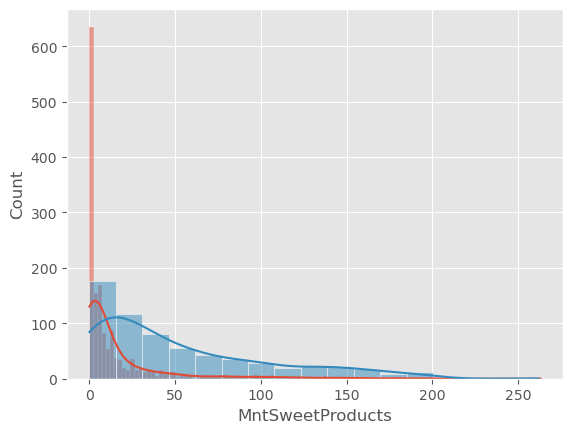

In [ ]:
# Проверка нормальности (необязательно)
sns.histplot(kids['MntSweetProducts'], kde=True)
sns.histplot(no_kids['MntSweetProducts'], kde=True)

Распределение переменной MntSweetProducts на гистограммах выглядит сильно скошенным вправо. Много клиентов с малыми затратами, и очень мало — с большими.
Поэтому используем непараметрический тест Манна–Уитни, и Bootstrap-медиан и доверительных интервалов.

In [ ]:
# Манн–Уитни
stat1, pval1 = mannwhitneyu(kids["MntSweetProducts"], no_kids["MntSweetProducts"], alternative='greater')

# Bootstrap 95% CI
boot_diffs = []
for _ in range(10000):
    sample1 = resample(kids["MntSweetProducts"], replace=True)
    sample2 = resample(no_kids["MntSweetProducts"], replace=True)
    boot_diffs.append(sample1.median() - sample2.median())

ci_low, ci_high = np.percentile(boot_diffs, [2.5, 97.5])

Тест: покупки со скидкой

In [ ]:
stat2, pval2 = mannwhitneyu(kids["NumDealsPurchases"], no_kids["NumDealsPurchases"], alternative='greater')

Результаты проверки гипотезы

Результаты проверки гипотезы:
MntSweetProducts:
 - Статистика: 233457.50
 - P-value: 1.0000
95% CI разницы медиан: [-36.00; -26.00]

NumDealsPurchases:
 - Статистика: 846946.00
 - P-value: 0.0000


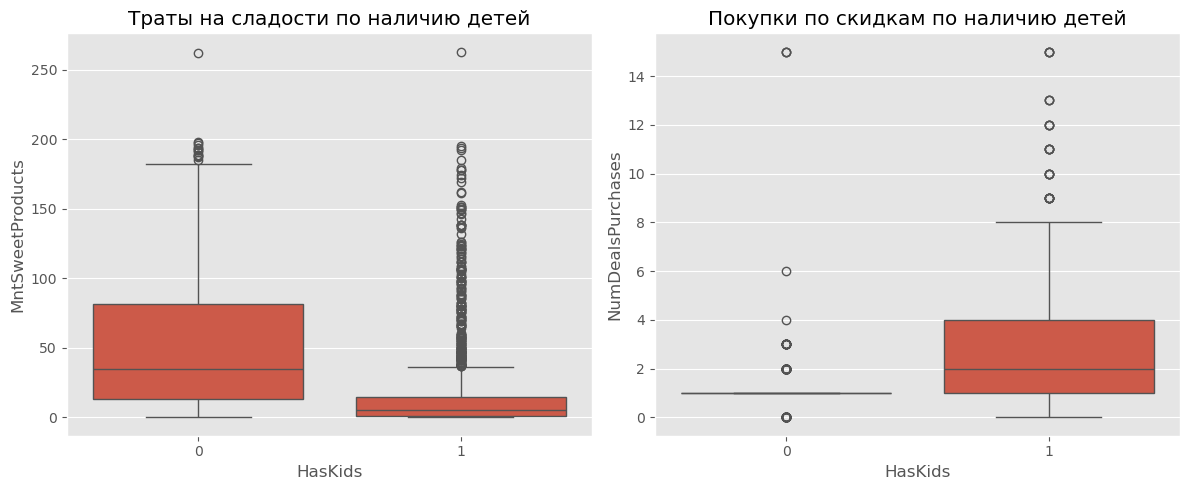

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x="HasKids", y="MntSweetProducts", ax=axs[0])
axs[0].set_title("Траты на сладости по наличию детей")

sns.boxplot(data=df, x="HasKids", y="NumDealsPurchases", ax=axs[1])
axs[1].set_title("Покупки по скидкам по наличию детей")
plt.tight_layout()

print(f"Результаты проверки гипотезы:")
print(f"MntSweetProducts:\n - Статистика: {stat1:.2f}\n - P-value: {pval1:.4f}")
print(f"95% CI разницы медиан: [{ci_low:.2f}; {ci_high:.2f}]")

print(f"\nNumDealsPurchases:\n - Статистика: {stat2:.2f}\n - P-value: {pval2:.4f}")

Выводы
1. MntSweetProducts:
* нет статистически значимых различий в тратах на сладости между семьями с детьми и без. Более того, медианная разница отрицательная — семьи с детьми тратят меньше. Нулевая гипотеза не отвергнута.
* Boxplot по MntSweetProducts показывает, что бездетные клиенты в среднем тратят больше на сладости.

2. NumDealsPurchases:
* статистически значимое различие есть — семьи с детьми чаще совершают покупки по скидкам. Нулевая гипотеза отвергнута.
* Boxplot по NumDealsPurchases — семьи с детьми явно активнее покупают по скидкам.

Семейные клиенты чувствительны к скидкам. Продуктовые предложения для них стоит адаптировать не по объёму (как ожидалось), а по выгоде, упаковке и частоте промо.

## Гипотеза 2 – «Стаж клиента влияет на отклик»

**Формулировка:**  
«Старые» клиенты (стаж > 12 месяцев, `Dt_Customer`) чаще откликаются на кампанию (`Response = 1`), чем «новые» (стаж ≤ 12 месяцев).

**Обоснование:**  
Предполагалось, что новые клиенты проявляют больше интереса на этапе онбординга. Однако возможно, что именно «старые» клиенты — более лояльные и склонны чаще откликаться на предложения. Гипотеза направлена на проверку этой альтернативной гипотезы.

**Бизнес-смысл:**  
Подтверждение гипотезы оправдывает фокус на удержании и стимулировании повторных покупок у лояльных клиентов, а не на избыточных вложениях в онбординг. Это позволит:
- сократить маркетинговые расходы на новые сегменты;
- усилить программы лояльности для старых клиентов;
- повысить ROI за счёт более эффективного таргетинга.

**H0 (нулевая гипотеза):**  
Доли отклика (`Response = 1`) у новых (≤ 12 месяцев) и старых (> 12 месяцев) клиентов одинаковы.

**H1 (альтернативная гипотеза):**  
Доля отклика у «старых» клиентов выше, чем у «новых».

**Переменные:**  
- `Dt_Customer` — дата регистрации клиента;  
- `StajFlag` — бинарная переменная (1 = новый, 0 = старый);  
- `Response` — отклик на кампанию (1 = отклик, 0 = нет).

**Тест / метод:**  
- Хи-квадрат тест независимости по таблице сопряженности `StajFlag × Response`, α = 0.05.  
- Логистическая регрессия: `Response ~ StajFlag` (опционально, для подтверждения направления и силы эффекта).


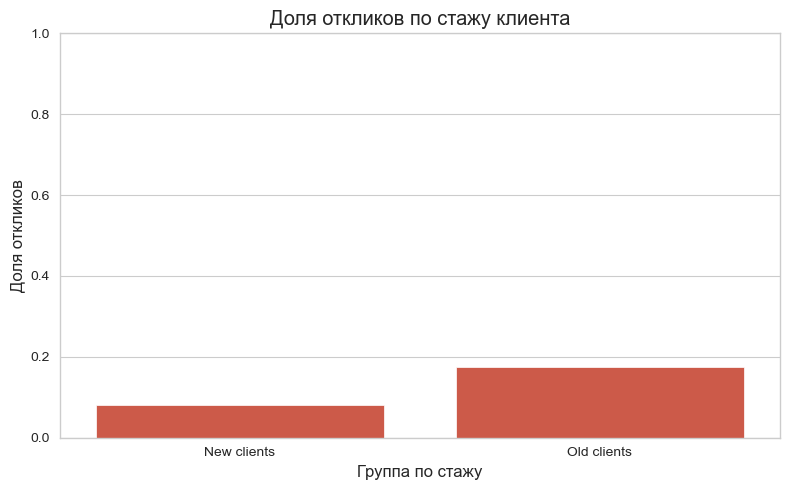

Результаты теста:
Chi2 = 31.01
P-value = 0.0000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Преобразуем дату клиента в формат datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Определяем максимальную дату в данных
reference_date = df['Dt_Customer'].max()

# Создаём переменную "стаж клиента": 1 — новый клиент (за последние 12 мес), 0 — старый
df['StajFlag'] = (df['Dt_Customer'] >= (reference_date - pd.DateOffset(months=12))).astype(int)

# Добавляем читаемую группу
df['StajGroup'] = df['StajFlag'].map({1: 'New clients', 0: 'Old clients'})

# Преобразуем Response в числовой формат (если нужно)
if df['Response'].dtype == object:
    df['Response_numeric'] = df['Response'].map({'Купил': 1, 'Не купил': 0})
else:
    df['Response_numeric'] = df['Response']

# Фильтруем данные, удаляя пропуски
df_filtered = df[['StajFlag', 'StajGroup', 'Response_numeric']].dropna()

# Проверим, что переменные есть и заполнены
if df_filtered.empty:
    raise ValueError("После фильтрации нет данных для анализа.")

# Доля откликов
response_rates = df_filtered.groupby('StajGroup')['Response_numeric'].mean().reset_index()

# Построим график
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='StajGroup', y='Response_numeric', data=response_rates)
plt.title('Доля откликов по стажу клиента')
plt.ylabel('Доля откликов')
plt.xlabel('Группа по стажу')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Хи-квадрат тест
contingency = pd.crosstab(df_filtered['StajFlag'], df_filtered['Response_numeric'])
chi2, p_value, dof, expected = chi2_contingency(contingency)

# Вывод результатов
print("Результаты теста:")
print(f"Chi2 = {chi2:.2f}")
print(f"P-value = {p_value:.4f}")


**Вывод:**  

Нулевая гипотеза отвергнута: доли откликов у новых (стаж ≤ 12 месяцев) и старых (стаж > 12 месяцев) клиентов **статистически значимо различаются**. Но в отличие от исходного предположения, **старые клиенты** откликнулись на кампанию **чаще**, чем новые. Возможные причины: отсутствие устойчивого интереса к продукту, слабая вовлечённость или ограниченный контакт с брендом на момент кампании.

**Рекомендации:**
- **Оптимизировать стратегию онбординга:** добавить дополнительные коммуникации или триггеры (e-mail, push, скидки) для новых клиентов в первые месяцы после регистрации.
- **Укреплять программы лояльности:** концентрировать усилия на поддержке заинтересованности клиентов со стажем > 12 месяцев.
- **Использовать стаж в сегментации:** использовать `StajFlag` при формировании целевых аудиторий для будущих кампаний.

## Гипотеза 3 – «Наличие детей снижает вероятность отклика на маркетинговую кампанию»

**Формулировка**

Клиенты, у которых есть дети (Kidhome > 0 или Teenhome > 0), реже откликаются на маркетинговую кампанию (Response = 1), по сравнению с клиентами без детей.

**Обоснование**:

Семьи с детьми обладают иным поведенческим профилем: бюджетные ограничения, ограниченное внимание к нецелевым кампаниям и приоритеты, отличающиеся от бездетных клиентов. Если предложения не адаптированы под семейные нужды, отклик может быть ниже.

**Бизнес-смысл:**
Если гипотеза подтвердится, маркетинговым командам следует разрабатывать отдельные кампании для клиентов с детьми, учитывающие их нужды и контекст. Это повысит релевантность коммуникаций и улучшит общую эффективность кампаний. Пренебрежение сегментированием может вести к потере потенциальной прибыли и лояльности.

**H0 (нулевая гипотеза):**
Вероятность отклика (Response = 1) одинакова у клиентов с детьми и без.

**H1 (альтернативная гипотеза):**
Клиенты с детьми реже откликаются на кампанию по сравнению с клиентами без детей.

**Переменные:**

Kidhome — количество маленьких детей

Teenhome — количество подростков

HasChildren — бинарная переменная (1 = есть дети, 0 = нет)

Response — бинарная переменная: отклик на кампанию

**Метод:**

Тест: Хи-квадрат тест независимости (HasChildren × Response), уровень значимости α = 0.05; логистическая регрессия Response ~ HasChildren



C:\Users\Crxdu\AppData\Local\Temp\ipykernel_7456\1310775496.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='HasChildren', y='mean', data=response_rates, palette='Set2', capsize=0.2)


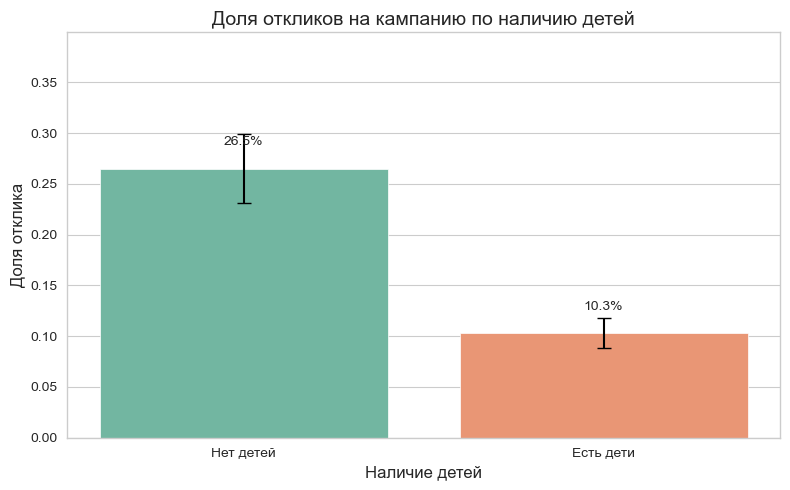


Таблица сопряженности (абсолютные значения):


Response_numeric,0,1,All
HasChildren,,,
0,469,169,638
1,1437,165,1602
All,1906,334,2240



Таблица сопряженности (в процентах):


Response_numeric,0,1
HasChildren,,
0,73.51,26.49
1,89.70,10.30



Хи-квадрат тест
  Статистика Хи-квадрат: 92.987
  p-значение: 0.0
  V Крамера (размер эффекта): 0.144
  Мин. ожидаемая частота: 95.13
  Вывод: Значимое отличие

Логистическая регрессия
  Отношение шансов (OR): 0.319
  95% ДИ OR: (0.251, 0.404)
  p-значение: 0.0
  Вывод: Наличие детей статистически снижает вероятность отклика


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from IPython.display import display

# Если уже было числовое преобразование, просто копируем
df['Response_numeric'] = df['Response'] if set(df['Response'].unique()) <= {0, 1} else df['Response'].map({'Купил': 1, 'Не купил': 0})

# Создание бинарной переменной "Есть дети"
df['HasChildren'] = ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int)

# Проверка и очистка данных
df_model = df[['Response_numeric', 'HasChildren']].dropna()

# Проверка на наличие данных
if df_model.empty:
    raise ValueError("Нет данных для анализа после удаления пропусков.")

# Хи-квадрат тест: таблица сопряженности
contingency = pd.crosstab(df_model['HasChildren'], df_model['Response_numeric'], margins=True)
contingency_pct = pd.crosstab(df_model['HasChildren'], df_model['Response_numeric'], normalize='index') * 100

chi2, p_value, dof, expected = chi2_contingency(contingency.iloc[:-1, :-1])
n = contingency.iloc[:-1, :-1].to_numpy().sum()
phi2 = chi2 / n
r, k = contingency.shape[0] - 1, contingency.shape[1] - 1
cramers_v = np.sqrt(phi2 / min(r, k))

# Логистическая регрессия
logit_model = smf.logit('Response_numeric ~ HasChildren', data=df_model).fit(disp=0)
odds_ratio = np.exp(logit_model.params['HasChildren'])
conf = logit_model.conf_int().loc['HasChildren']
conf_odds = np.exp(conf)

# Подготовка данных для визуализации
response_rates = df_model.groupby('HasChildren')['Response_numeric'].agg(['mean', 'count']).reset_index()
response_rates['HasChildren'] = response_rates['HasChildren'].map({0: 'Нет детей', 1: 'Есть дети'})
response_rates['se'] = np.sqrt(response_rates['mean'] * (1 - response_rates['mean']) / response_rates['count'])
response_rates['ci_lower'] = response_rates['mean'] - 1.96 * response_rates['se']
response_rates['ci_upper'] = response_rates['mean'] + 1.96 * response_rates['se']

# Визуализация: столбчатая диаграмма с доверительными интервалами
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(x='HasChildren', y='mean', data=response_rates, palette='Set2', capsize=0.2)
for i, row in response_rates.iterrows():
    ax.text(i, row['mean'] + 0.02, f'{row["mean"]:.1%}', ha='center', va='bottom')
plt.errorbar(x=response_rates.index, y=response_rates['mean'],
             yerr=1.96 * response_rates['se'], fmt='none', c='black', capsize=5)
plt.title('Доля откликов на кампанию по наличию детей', fontsize=14)
plt.ylabel('Доля отклика')
plt.xlabel('Наличие детей')
plt.ylim(0, max(response_rates['ci_upper']) + 0.1)
plt.tight_layout()
plt.show()

# Интерпретация результатов
summary = {
    "Хи-квадрат тест": {
        "Статистика Хи-квадрат": round(chi2, 3),
        "p-значение": round(p_value, 4),
        "V Крамера (размер эффекта)": round(cramers_v, 3),
        "Мин. ожидаемая частота": round(expected.min(), 2),
        "Вывод": "Значимое отличие" if p_value < 0.05 else "Отличий не обнаружено"
    },
    "Логистическая регрессия": {
        "Отношение шансов (OR)": round(odds_ratio, 3),
        "95% ДИ OR": tuple(np.round(conf_odds, 3)),
        "p-значение": round(logit_model.pvalues['HasChildren'], 4),
        "Вывод": (
            "Наличие детей статистически снижает вероятность отклика"
            if logit_model.pvalues['HasChildren'] < 0.05 and odds_ratio < 1
            else "Эффект отсутствует или положительный"
        )
    }
}

def print_summary(summary_dict):
    for block, content in summary_dict.items():
        print(f"\n{block}")
        for key, value in content.items():
            print(f"  {key}: {value}")

# Вывод таблиц и интерпретации
print("\nТаблица сопряженности (абсолютные значения):")
display(contingency)

print("\nТаблица сопряженности (в процентах):")
display(contingency_pct.round(2))

print_summary(summary)


Вывод

- **Результаты chi2-теста:**
  - chi2 = 92.99, p-value < 0.0001
  - Минимальное ожидаемое значение в таблице: 95.13 (допущения соблюдены)
  - **Вывод:** Нулевая гипотеза отвергается. Имеется статистически значимая разница в откликах между клиентами с детьми и без.

- **Результаты логистической регрессии:**
  - Отношение шансов (odds ratio) = **0.319**, 95% CI: [0.251, 0.404], p-value < 0.0001
  - Наличие детей **снижает вероятность отклика более чем в 3 раза**. Эффект статистически значим.

- Клиенты **без детей откликаются чаще**: ~26.5% против ~10.3%.
- Наличие детей оказывает **отрицательное влияние на отклик**.
- Эффект подтверждён **двумя независимыми методами**: хи-квадрат и логистической регрессией.

Рекомендации

1. **Сегментировать аудиторию по наличию детей** (переменная `HasChildren`) для повышения точности таргетинга.
2. **Разработать отдельные кампании и предложения для семей с детьми**, учитывая их особые потребности (товары для детей, семейные наборы, гибкие форматы коммуникаций).
3. **Исключить клиентов с детьми из массовых кампаний**, нацеленных на индивидуальных потребителей, чтобы не снижать общий отклик.
4. **Использовать переменную `HasChildren` как фичу в модели предсказания отклика** (feature engineering).


## Гипотеза 4 – «Мультиканальные клиенты более склонны откликаться на кампанию»

**Формулировка**

Клиенты, которые совершают покупки через все три канала — магазин (`NumStorePurchases`), веб-сайт (`NumWebPurchases`) и каталог (`NumCatalogPurchases`) — имеют более высокую вероятность отклика (Response = 1), чем остальные клиенты.

**Обоснование**

Активность во всех каналах продаж — признак высокой вовлечённости, лояльности и доверия к бренду. Такие клиенты более открыты коммуникациям и с большей вероятностью примут участие в маркетинговых инициативах.

**Бизнес-смысл**

Подтверждение гипотезы позволит:
- Сегментировать "тёплую" аудиторию — мультиканальных клиентов.
- Нацелить на них персонализированные или премиальные предложения.
- Повысить отклик и рентабельность кампаний за счёт фокусировки на лояльной группе.

**H₀ (нулевая гипотеза)**

Вероятность отклика (Response = 1) **не зависит** от того, активен ли клиент во всех трёх каналах.

**H₁ (альтернативная гипотеза)**

Клиенты, использующие **все три канала**, откликаются **чаще**, чем остальные.

**Переменные**

- **NumWebPurchases** — количество покупок через сайт.
- **NumCatalogPurchases** — количество покупок по каталогу.
- **NumStorePurchases** — количество покупок в магазине.
- **ChannelCount** — количество каналов с активностью (>0).
- **IsMultichannel** — бинарная переменная: 1, если ChannelCount == 3, иначе 0.
- **Response** — целевая переменная: 1 — отклик, 0 — нет.

**Тест**

- Хи-квадрат тест независимости (IsMultichannel × Response).
- логистическая регрессия `Response ~ IsMultichannel`.

C:\Users\Crxdu\AppData\Local\Temp\ipykernel_7456\3057118472.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='IsMultichannel', y='mean', data=response_rate, capsize=0.1, palette='Set1')


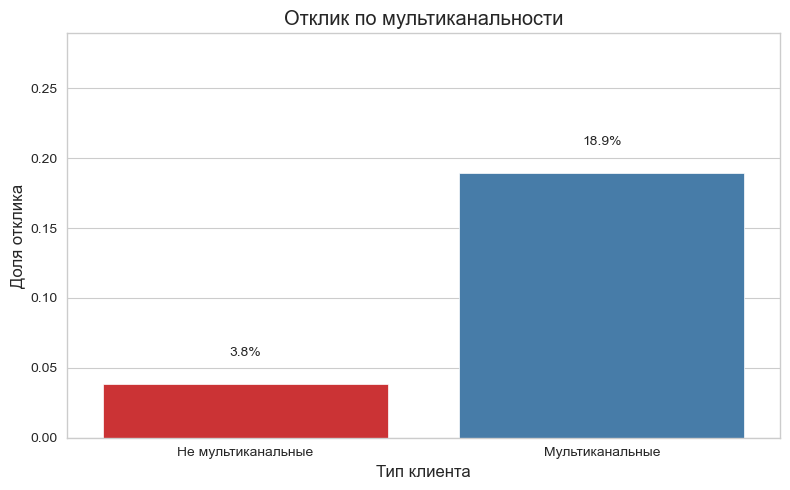

Таблица сопряжённости (counts):


Response_numeric,0,1,All
IsMultichannel,,,
0,575,23,598
1,1331,311,1642
All,1906,334,2240


Таблица сопряжённости (проценты):


Response_numeric,0,1
IsMultichannel,,
0,96.15,3.85
1,81.06,18.94



Хи-квадрат тест:
Хи-квадрат = 77.532, p-value = 0.0000, Cramer's V = 0.132
Вывод: Нулевая гипотеза отвергнута.

Логистическая регрессия:
Odds Ratio = 5.841, 95% CI = (3.782, 9.022), p-value = 0.0000
Вывод: Мультиканальные клиенты статистически значимо чаще откликаются.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from IPython.display import display

# Преобразование Response в числовую переменную
if df['Response'].dtype == object:
    df['Response_numeric'] = df['Response'].map({'Купил': 1, 'Не купил': 0})
else:
    df['Response_numeric'] = df['Response']  # Уже числовая

# Создание переменной ChannelCount
df['ChannelCount'] = (
    (df['NumWebPurchases'] > 0).astype(int) +
    (df['NumCatalogPurchases'] > 0).astype(int) +
    (df['NumStorePurchases'] > 0).astype(int)
)

# Бинарная переменная: мультиканальный клиент
df['IsMultichannel'] = (df['ChannelCount'] == 3).astype(int)

# Удаление пропусков перед анализом
df_model = df[['Response_numeric', 'IsMultichannel']].dropna()
if df_model.empty:
    raise ValueError("Нет данных для анализа после удаления пропусков.")

#  Хи-квадрат тест
contingency = pd.crosstab(df_model['IsMultichannel'], df_model['Response_numeric'], margins=True)
contingency_pct = pd.crosstab(df_model['IsMultichannel'], df_model['Response_numeric'], normalize='index') * 100

chi2, p_value, dof, expected = chi2_contingency(contingency.iloc[:-1, :-1])
min_expected = expected.min()
n = contingency.iloc[:-1, :-1].to_numpy().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

#Логистическая регрессия
model = smf.logit("Response_numeric ~ IsMultichannel", data=df_model).fit(disp=0)
odds_ratio = np.exp(model.params['IsMultichannel'])
ci = model.conf_int().loc['IsMultichannel']
odds_ci = np.exp(ci)

# Визуализация
response_rate = df_model.groupby('IsMultichannel')['Response_numeric'].agg(['mean', 'count']).reset_index()
response_rate['IsMultichannel'] = response_rate['IsMultichannel'].map({0: 'Не мультиканальные', 1: 'Мультиканальные'})
response_rate['se'] = np.sqrt(response_rate['mean'] * (1 - response_rate['mean']) / response_rate['count'])

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(x='IsMultichannel', y='mean', data=response_rate, capsize=0.1, palette='Set1')
for i, row in response_rate.iterrows():
    ax.text(i, row['mean'] + 0.02, f"{row['mean']:.1%}", ha='center')
plt.ylabel("Доля отклика")
plt.xlabel("Тип клиента")
plt.title("Отклик по мультиканальности")
plt.ylim(0, max(response_rate['mean'] + 0.1))
plt.tight_layout()
plt.show()


print("Таблица сопряжённости (counts):")
display(contingency)

print("Таблица сопряжённости (проценты):")
display(contingency_pct.round(2))

print("\nХи-квадрат тест:")
print(f"Хи-квадрат = {chi2:.3f}, p-value = {p_value:.4f}, Cramer's V = {cramers_v:.3f}")
print("Вывод:", "Нулевая гипотеза отвергнута." if p_value < 0.05 else "Нулевая гипотеза не отвергнута.")

print("\nЛогистическая регрессия:")
print(f"Odds Ratio = {odds_ratio:.3f}, 95% CI = ({odds_ci[0]:.3f}, {odds_ci[1]:.3f}), p-value = {model.pvalues['IsMultichannel']:.4f}")
print("Вывод:", "Мультиканальные клиенты статистически значимо чаще откликаются."
      if model.pvalues['IsMultichannel'] < 0.05 and odds_ratio > 1
      else "Эффект незначим.")

Статистические выводы

- **Хи-квадрат тест:**
  - Хи-квадрат = 77.53, p-value < 0.001
  - Cramer's V = 0.107 → небольшой, но ощутимый эффект
  - Нулевая гипотеза отвергнута: **различие в доле откликов между мультиканальными и немультиканальными клиентами статистически значимо.**

- **Логистическая регрессия:**
  - Odds Ratio = 5.841
  - 95% доверительный интервал: (3.782, 9.022)
  - p-value < 0.001
  - Мультиканальные клиенты имеют почти **в 6 раз большую вероятность отклика**, чем остальные.

Вывод

Наличие активности клиента во всех трёх каналах (веб, магазин, каталог) существенно повышает вероятность отклика на маркетинговую кампанию. Это означает, что мультиканальные клиенты более лояльны, вовлечены и восприимчивы к маркетинговым предложениям.

Мультиканальность — важный признак "тёплой" аудитории. Её стоит использовать как ключевой флаг при таргетировании и сегментации клиентов.

Рекомендации

1. **Фокус на мультиканальных клиентах:**
   - Выделить таких клиентов в отдельный сегмент и сконцентрироваться на них при запуске новых кампаний.

2. **Стимулирование многоканального поведения:**
   - Разработать программы мотивации для немультиканальных клиентов: предложите скидки или бонусы за покупки через новые для них каналы (например, первый заказ по каталогу или в веб-магазине).

3. **Персонализация коммуникации:**
   - Интегрировать данные о каналах взаимодействия для создания более точных профилей клиентов и релевантных офферов.

4. **Анализ поведения в каналах:**
   - Углубить анализ: какие именно комбинации каналов наиболее эффективны?


## Гипотеза 6 – «Количество посещений сайта влияет на принятие предложения»

In [ ]:
visits_accepted = df[df['Response'] == 1]['NumWebVisitsMonth']
visits_rejected = df[df['Response'] == 0]['NumWebVisitsMonth']

u_stat_visits, p_val_visits = stats.mannwhitneyu(visits_accepted, visits_rejected, alternative='two-sided')

print(f"U-Statistic: {u_stat_visits:.4f}, P-Value: {p_val_visits:.4f}")

U-Statistic: 323793.5000, P-Value: 0.6115


**Вывод:** Нет статистически значимых различий в количестве посещений сайта между клиентами, которые приняли предложение, и теми, кто его отклонил. Мы не можем отвергнуть нулевую гипотезу о том, что количество посещений не влияет на принятие предложения.